In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import optimizers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras import regularizers


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [3]:
%matplotlib inline

In [4]:
image_index = 7777

In [5]:
print(y_train[image_index])

8


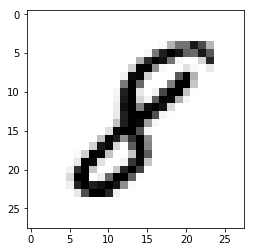

In [6]:
plt.imshow(x_train[image_index], cmap='Greys')

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [9]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
input_shape = (28, 28, 1)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
# Normalizing the RGB values.
x_train /= 255
x_test /= 255

In [13]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [14]:
# Creating a Sequential Model and adding the layers
model = Sequential()

model.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(8, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(32, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(8, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(32, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(2,2), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(8, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(32, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
# model summary
summary = model.summary()
print(summary)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         520       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        288       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
__________

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 114s 3ms/step - loss: 0.2844 - acc: 0.9100 - val_loss: 0.0967 - val_acc: 0.9670
Epoch 2/10
45000/45000 [==============================] - 113s 3ms/step - loss: 0.1058 - acc: 0.9668 - val_loss: 0.0816 - val_acc: 0.9745
Epoch 3/10
45000/45000 [==============================] - 114s 3ms/step - loss: 0.0847 - acc: 0.9736 - val_loss: 0.0637 - val_acc: 0.9801
Epoch 4/10
45000/45000 [==============================] - 115s 3ms/step - loss: 0.0704 - acc: 0.9778 - val_loss: 0.0523 - val_acc: 0.9843
Epoch 5/10
45000/45000 [==============================] - 115s 3ms/step - loss: 0.0610 - acc: 0.9804 - val_loss: 0.0472 - val_acc: 0.9865
Epoch 6/10
45000/45000 [==============================] - 116s 3ms/step - loss: 0.0540 - acc: 0.9828 - val_loss: 0.0508 - val_acc: 0.9840
Epoch 7/10
45000/45000 [==============================] - 115s 3ms/step - 

In [17]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 513us/step


[0.04502862603109388, 0.9877]

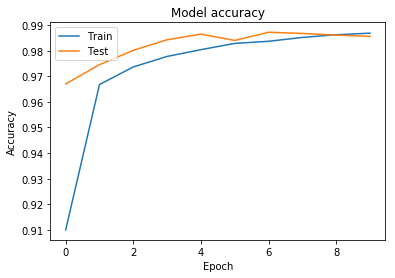

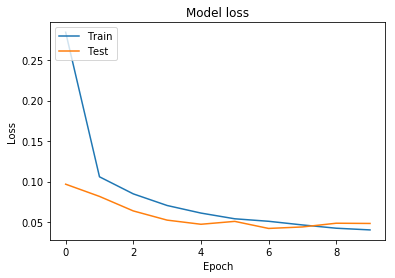

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# plt.savefig('figures/part2/mnist_model_part2-training-validation-accurracy.png')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# plt.savefig('figures/part2/mnist_model_part2-training-validation-loss.png')

In [19]:
# save model
model.save('models/mnist_model_part2.h5')  # creates a HDF5 file